# Reinforcement Learning: Zero to Hero - Part 8/17

**Cells 141-160 of 291**



In [72]:
class QNetwork(nn.Module):
    """Deep Q-Network for approximating Q-values.
    
    This network takes a state as input and outputs Q-values for all actions.
    """
    
    def __init__(self, state_dim, action_dim, hidden_dims=[64, 64]):
        """
        Initialize the Q-Network.
        
        Args:
            state_dim: Dimension of the state space (input size)
            action_dim: Number of possible actions (output size)
            hidden_dims: List of hidden layer sizes
        """
        super(QNetwork, self).__init__()
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # Build the network layers
        layers = []
        
        # Input layer
        prev_dim = state_dim
        
        # Hidden layers
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        
        # Output layer (no activation - Q-values can be any real number)
        layers.append(nn.Linear(prev_dim, action_dim))
        
        # Combine all layers into a sequential model
        self.network = nn.Sequential(*layers)
        
        # Initialize weights using Xavier initialization
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize network weights for better training."""
        for module in self.network:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0.0)
    
    def forward(self, state):
        """
        Forward pass through the network.
        
        Args:
            state: State tensor of shape (batch_size, state_dim) or (state_dim,)
        
        Returns:
            Q-values for all actions, shape (batch_size, action_dim) or (action_dim,)
        """
        return self.network(state)
    
    def get_action(self, state, epsilon=0.0):
        """
        Select an action using epsilon-greedy policy.
        
        Args:
            state: Current state (numpy array or tensor)
            epsilon: Exploration rate (0 = greedy, 1 = random)
        
        Returns:
            Selected action (integer)
        """
        # Exploration: random action
        if np.random.random() < epsilon:
            return np.random.randint(self.action_dim)
        
        # Exploitation: greedy action
        with torch.no_grad():
            # Convert state to tensor if needed
            if isinstance(state, np.ndarray):
                state = torch.FloatTensor(state)
            
            # Get Q-values and select best action
            q_values = self.forward(state)
            action = torch.argmax(q_values).item()
            
        return action
    
    def get_q_values(self, state):
        """
        Get Q-values for a state.
        
        Args:
            state: State tensor or numpy array
        
        Returns:
            Q-values as numpy array
        """
        with torch.no_grad():
            if isinstance(state, np.ndarray):
                state = torch.FloatTensor(state)
            q_values = self.forward(state)
            return q_values.numpy()


print("Q-Network Implementation Complete!")
print("=" * 60)
print("Key Features:")
print("  • Flexible architecture with configurable hidden layers")
print("  • Xavier weight initialization for stable training")
print("  • Epsilon-greedy action selection built-in")
print("  • Handles both single states and batches")
print("  • PyTorch implementation for GPU acceleration")

Q-Network Implementation Complete!
Key Features:
  • Flexible architecture with configurable hidden layers
  • Xavier weight initialization for stable training
  • Epsilon-greedy action selection built-in
  • Handles both single states and batches
  • PyTorch implementation for GPU acceleration


#### Demonstrating the Q-Network with Sample States

Let's create a Q-network and see how it processes states and produces Q-values.

In [73]:
# Example 1: Simple Q-Network for CartPole-like environment
print("Example 1: Q-Network for CartPole Environment")
print("=" * 60)

# CartPole has 4-dimensional state and 2 actions
state_dim = 4  # [cart position, cart velocity, pole angle, pole angular velocity]
action_dim = 2  # [push left, push right]

# Create Q-network
q_net = QNetwork(state_dim=state_dim, action_dim=action_dim, hidden_dims=[64, 64])

print(f"Network Architecture:")
print(q_net)

# Count parameters
total_params = sum(p.numel() for p in q_net.parameters())
trainable_params = sum(p.numel() for p in q_net.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Create a sample state
sample_state = np.array([0.02, 0.5, -0.1, 0.3])  # Example CartPole state
print(f"Sample State: {sample_state}")

# Forward pass: get Q-values
q_values = q_net.get_q_values(sample_state)
print(f"Q-values:")
print(f"  Q(s, left):  {q_values[0]:.4f}")
print(f"  Q(s, right): {q_values[1]:.4f}")

# Select action (greedy)
action = q_net.get_action(sample_state, epsilon=0.0)
action_name = "LEFT" if action == 0 else "RIGHT"
print(f"Greedy Action: {action} ({action_name})")

# Select action with exploration
print(f"With ε=0.1 exploration:")
actions = [q_net.get_action(sample_state, epsilon=0.1) for _ in range(10)]
print(f"  10 action samples: {actions}")
print(f"  Greedy action selected: {actions.count(action)}/10 times")

Example 1: Q-Network for CartPole Environment
Network Architecture:
QNetwork(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)
Total parameters: 4,610
Trainable parameters: 4,610
Sample State: [ 0.02  0.5  -0.1   0.3 ]
Q-values:
  Q(s, left):  -0.0204
  Q(s, right): 0.0472
Greedy Action: 1 (RIGHT)
With ε=0.1 exploration:
  10 action samples: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  Greedy action selected: 10/10 times


In [74]:
# Example 2: Batch Processing
print("" + "=" * 60)
print("Example 2: Batch Processing Multiple States")
print("=" * 60)

# Create a batch of states
batch_size = 5
batch_states = np.random.randn(batch_size, state_dim)

print(f"Batch of {batch_size} states:")
print(batch_states)

# Forward pass with batch
batch_states_tensor = torch.FloatTensor(batch_states)
batch_q_values = q_net(batch_states_tensor)

print(f"Batch Q-values (shape: {batch_q_values.shape}):")
print(batch_q_values.detach().numpy())

# Select best action for each state in batch
best_actions = torch.argmax(batch_q_values, dim=1)
print(f"Best actions for each state: {best_actions.numpy()}")

Example 2: Batch Processing Multiple States
Batch of 5 states:
[[-1.79689734  0.15741383 -0.23499425 -0.90729806]
 [ 0.80810175 -2.81336207 -1.20969652 -1.17526947]
 [ 0.75377832 -0.65226638  1.4746763   1.77429179]
 [ 1.29713835 -1.56138698  0.60457279 -2.03403545]
 [-0.56951432  1.51017292  1.19892891 -1.1039704 ]]
Batch Q-values (shape: torch.Size([5, 2])):
[[ 0.2261371   0.15909593]
 [ 0.3634955   0.3504169 ]
 [-0.14823097  0.42988285]
 [ 0.09288861  0.154318  ]
 [-0.01048703  0.17452493]]
Best actions for each state: [0 0 1 1 1]


In [75]:
# Example 3: Different Network Architectures
print("" + "=" * 60)
print("Example 3: Comparing Different Network Architectures")
print("=" * 60)

architectures = {
    'Small': [32],
    'Medium': [64, 64],
    'Large': [128, 128, 64],
    'Deep': [64, 64, 64, 64]
}

print(f"State dim: {state_dim}, Action dim: {action_dim}")

for name, hidden_dims in architectures.items():
    net = QNetwork(state_dim=state_dim, action_dim=action_dim, hidden_dims=hidden_dims)
    params = sum(p.numel() for p in net.parameters())
    
    print(f"{name:10s} {str(hidden_dims):20s} → {params:,} parameters")

print("💡 Architecture Selection Tips:")
print("   • Start with medium-sized networks (64-128 units)")
print("   • Increase size if underfitting (poor performance)")
print("   • Decrease size if overfitting or slow training")
print("   • Deeper networks can learn more complex patterns")
print("   • But require more data and careful tuning")

Example 3: Comparing Different Network Architectures
State dim: 4, Action dim: 2
Small      [32]                 → 226 parameters
Medium     [64, 64]             → 4,610 parameters
Large      [128, 128, 64]       → 25,538 parameters
Deep       [64, 64, 64, 64]     → 12,930 parameters
💡 Architecture Selection Tips:
   • Start with medium-sized networks (64-128 units)
   • Increase size if underfitting (poor performance)
   • Decrease size if overfitting or slow training
   • Deeper networks can learn more complex patterns
   • But require more data and careful tuning


Example 4: Visualizing Q-values Across State Space


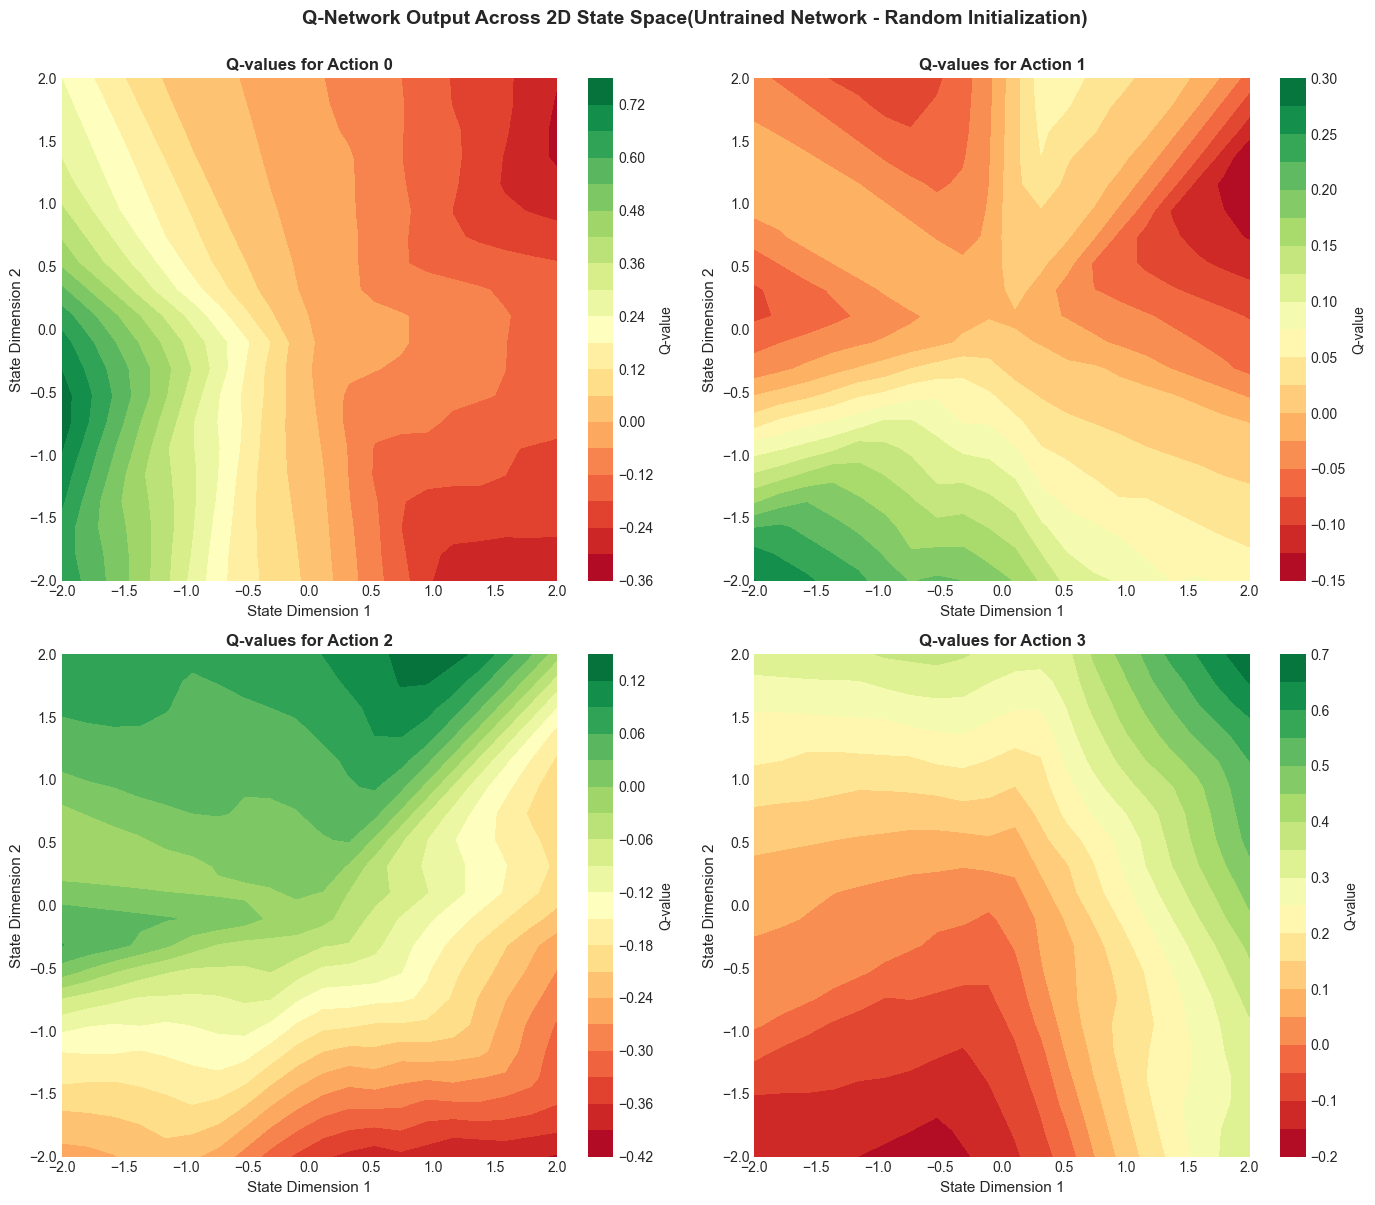

📊 Interpretation:
   • Each subplot shows Q-values for one action
   • Colors indicate Q-value magnitude (green=high, red=low)
   • This is an UNTRAINED network (random weights)
   • After training, Q-values would reflect learned policy
   • The network can generalize to unseen states!


In [76]:
# Example 4: Visualizing Q-values for Different States
print("" + "=" * 60)
print("Example 4: Visualizing Q-values Across State Space")
print("=" * 60)

# Create a simple 2D state space for visualization
simple_q_net = QNetwork(state_dim=2, action_dim=4, hidden_dims=[32, 32])

# Generate a grid of states
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Compute Q-values for each state in the grid
q_values_grid = np.zeros((20, 20, 4))

for i in range(20):
    for j in range(20):
        state = np.array([X[i, j], Y[i, j]])
        q_values_grid[i, j] = simple_q_net.get_q_values(state)

# Plot Q-values for each action
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
action_names = ['Action 0', 'Action 1', 'Action 2', 'Action 3']

for idx, (ax, action_name) in enumerate(zip(axes.flat, action_names)):
    im = ax.contourf(X, Y, q_values_grid[:, :, idx], levels=20, cmap='RdYlGn')
    ax.set_xlabel('State Dimension 1', fontsize=11)
    ax.set_ylabel('State Dimension 2', fontsize=11)
    ax.set_title(f'Q-values for {action_name}', fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=ax, label='Q-value')
    ax.grid(True, alpha=0.3)

plt.suptitle('Q-Network Output Across 2D State Space(Untrained Network - Random Initialization)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   • Each subplot shows Q-values for one action")
print("   • Colors indicate Q-value magnitude (green=high, red=low)")
print("   • This is an UNTRAINED network (random weights)")
print("   • After training, Q-values would reflect learned policy")
print("   • The network can generalize to unseen states!")

#### Summary: Neural Network Q-Function

**What We Learned:**

1. **Function Approximation**:
   - Replaces Q-tables with neural networks
   - Enables handling of large/continuous state spaces
   - Provides generalization to unseen states

2. **Q-Network Architecture**:
   - Input: State representation
   - Hidden layers: Feature extraction with ReLU activations
   - Output: Q-values for all actions (no activation)

3. **Key Design Decisions**:
   - Network size: Balance capacity vs. sample efficiency
   - Depth: Deeper networks for complex patterns
   - Initialization: Xavier/He initialization for stable training

4. **Advantages Over Tabular Methods**:
   - **Scalability**: Handle millions of states with thousands of parameters
   - **Generalization**: Similar states produce similar Q-values
   - **Flexibility**: Can process raw sensory inputs (images, audio)
   - **Efficiency**: Share knowledge across similar states

5. **Implementation Details**:
   - PyTorch provides automatic differentiation for training
   - Batch processing for efficient computation
   - Epsilon-greedy action selection integrated
   - GPU acceleration available

**Next Steps:**

We now have a Q-network that can approximate Q-values, but we haven't trained it yet! In the next sections, we'll learn about:

- **Experience Replay**: Storing and reusing past experiences for stable training
- **Target Networks**: Preventing moving target problems during training
- **DQN Training**: Putting it all together to learn from experience
- **Double DQN**: Reducing overestimation bias

These techniques are crucial for making deep Q-learning work in practice!

#### Experience Replay

**The Problem with Online Learning**

When training a Q-network, a naive approach would be to update the network immediately after each interaction with the environment:

1. Observe state $s_t$
2. Take action $a_t$
3. Receive reward $r_t$ and next state $s_{t+1}$
4. Immediately update the network using this single transition
5. Discard the transition and move on

**Why This Fails:**

This online learning approach has several critical problems:

1. **Correlation Between Consecutive Samples**:
   - Sequential experiences are highly correlated
   - The agent visits similar states in succession
   - Neural networks assume i.i.d. (independent and identically distributed) data
   - Correlated samples lead to poor convergence and overfitting

2. **Sample Inefficiency**:
   - Each experience is used only once for learning
   - Gathering experiences can be expensive (especially in real-world scenarios)
   - We're throwing away valuable data!

3. **Catastrophic Forgetting**:
   - The network quickly forgets what it learned about earlier states
   - As the agent explores new regions, it "overwrites" knowledge about previous regions
   - This leads to unstable and oscillating behavior

**The Solution: Experience Replay**

Experience replay, introduced in the original DQN paper (Mnih et al., 2015), solves these problems elegantly:

**Key Idea**: Store past experiences in a **replay buffer** (memory) and randomly sample mini-batches for training.

**How It Works:**

1. **Store**: Save each transition $(s_t, a_t, r_t, s_{t+1}, done_t)$ in a replay buffer
2. **Sample**: Randomly sample a mini-batch of transitions from the buffer
3. **Learn**: Update the network using the sampled batch
4. **Repeat**: Continue storing new experiences and sampling for training

**Why Experience Replay Works:**

1. **Breaks Correlation**:
   - Random sampling creates i.i.d. training batches
   - Transitions from different episodes and time steps are mixed
   - Network sees diverse experiences in each update

2. **Improves Sample Efficiency**:
   - Each experience can be used multiple times
   - Rare or important experiences aren't immediately forgotten
   - Better utilization of collected data

3. **Stabilizes Learning**:
   - Smooths out the learning process
   - Reduces variance in updates
   - Prevents catastrophic forgetting

4. **Enables Off-Policy Learning**:
   - Can learn from experiences generated by old policies
   - Decouples data collection from learning
   - More flexible training strategies

**Mathematical Perspective:**

The Q-learning update with experience replay:

$
\begin{align}
\text{Sample mini-batch: } & \{(s_i, a_i, r_i, s'_i, done_i)\}_{i=1}^{N} \sim \mathcal{D} \\
\text{Target: } & y_i = r_i + \gamma (1 - done_i) \max_{a'} Q(s'_i, a'; \theta^-) \\
\text{Loss: } & \mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - Q(s_i, a_i; \theta)\right)^2
\end{align}
$

where:
- $\mathcal{D}$ is the replay buffer
- $N$ is the mini-batch size
- $\theta$ are the current network parameters
- $\theta^-$ are the target network parameters (we'll cover this next)

**Practical Considerations:**

- **Buffer Size**: Typically 10,000 to 1,000,000 transitions
  - Larger buffers provide more diversity but use more memory
  - Should be large enough to store experiences from many episodes

- **Batch Size**: Usually 32 to 256 transitions
  - Larger batches provide more stable gradients
  - Smaller batches train faster but with more variance

- **Sampling Strategy**: Uniform random sampling is most common
  - Advanced: Prioritized Experience Replay samples important transitions more often

- **When to Start Training**: Wait until buffer has enough samples
  - Typically start training after 1,000-10,000 initial experiences

Let's implement a replay buffer!

In [77]:
class ReplayBuffer:
    """Experience Replay Buffer for storing and sampling transitions.
    
    The replay buffer stores transitions (s, a, r, s', done) and provides
    random sampling for training. This breaks correlation between consecutive
    samples and improves sample efficiency.
    """
    
    def __init__(self, capacity=10000):
        """Initialize the replay buffer.
        
        Args:
            capacity: Maximum number of transitions to store
        """
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)  # Automatically removes old experiences
        self.position = 0
    
    def push(self, state, action, reward, next_state, done):
        """Store a transition in the buffer.
        
        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode ended
        """
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        """Sample a random batch of transitions.
        
        Args:
            batch_size: Number of transitions to sample
            
        Returns:
            Tuple of (states, actions, rewards, next_states, dones)
            Each element is a numpy array or list
        """
        # Randomly sample batch_size transitions
        batch = random.sample(self.buffer, batch_size)
        
        # Unzip the batch into separate arrays
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to numpy arrays for easier processing
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        next_states = np.array(next_states)
        dones = np.array(dones, dtype=np.float32)
        
        return states, actions, rewards, next_states, dones
    
    def __len__(self):
        """Return the current size of the buffer."""
        return len(self.buffer)
    
    def is_ready(self, batch_size):
        """Check if buffer has enough samples for training.
        
        Args:
            batch_size: Required batch size
            
        Returns:
            True if buffer has at least batch_size samples
        """
        return len(self.buffer) >= batch_size


print("ReplayBuffer class implemented successfully!")
print("Key Features:")
print("  • Stores transitions (s, a, r, s', done)")
print("  • Automatic capacity management with deque")
print("  • Random sampling for breaking correlations")
print("  • Efficient batch preparation")

ReplayBuffer class implemented successfully!
Key Features:
  • Stores transitions (s, a, r, s', done)
  • Automatic capacity management with deque
  • Random sampling for breaking correlations
  • Efficient batch preparation


#### Demonstrating the Replay Buffer

Let's see how the replay buffer works in practice with some examples.

In [78]:
# Example 1: Basic Usage
print("=" * 60)
print("Example 1: Basic Replay Buffer Operations")
print("=" * 60)

# Create a replay buffer with small capacity for demonstration
replay_buffer = ReplayBuffer(capacity=5)

print(f"Initial buffer size: {len(replay_buffer)}")
print(f"Buffer capacity: {replay_buffer.capacity}")

# Add some transitions
print("Adding transitions to buffer...")
for i in range(7):
    state = np.array([i, i*2])
    action = i % 4
    reward = i * 0.1
    next_state = np.array([i+1, (i+1)*2])
    done = (i == 6)
    
    replay_buffer.push(state, action, reward, next_state, done)
    print(f"  Step {i}: Added transition | Buffer size: {len(replay_buffer)}")

print(f"💡 Notice: Buffer size capped at {replay_buffer.capacity}")
print("   Oldest transitions are automatically removed!")

Example 1: Basic Replay Buffer Operations
Initial buffer size: 0
Buffer capacity: 5
Adding transitions to buffer...
  Step 0: Added transition | Buffer size: 1
  Step 1: Added transition | Buffer size: 2
  Step 2: Added transition | Buffer size: 3
  Step 3: Added transition | Buffer size: 4
  Step 4: Added transition | Buffer size: 5
  Step 5: Added transition | Buffer size: 5
  Step 6: Added transition | Buffer size: 5
💡 Notice: Buffer size capped at 5
   Oldest transitions are automatically removed!


In [79]:
# Example 2: Sampling from the Buffer
print("" + "=" * 60)
print("Example 2: Sampling Mini-Batches")
print("=" * 60)

# Create a larger buffer and fill it
replay_buffer = ReplayBuffer(capacity=100)

# Simulate collecting experiences
print("Collecting 50 experiences...")
for i in range(50):
    state = np.random.randn(4)  # Random 4D state
    action = np.random.randint(0, 3)  # Random action from {0, 1, 2}
    reward = np.random.randn()  # Random reward
    next_state = np.random.randn(4)
    done = (i % 10 == 9)  # Episode ends every 10 steps
    
    replay_buffer.push(state, action, reward, next_state, done)

print(f"Buffer size: {len(replay_buffer)}")

# Sample a mini-batch
batch_size = 8
print(f"Sampling mini-batch of size {batch_size}...")

states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

print(f"Batch contents:")
print(f"  States shape: {states.shape}")
print(f"  Actions shape: {actions.shape}")
print(f"  Rewards shape: {rewards.shape}")
print(f"  Next states shape: {next_states.shape}")
print(f"  Dones shape: {dones.shape}")

print(f"First 3 transitions in batch:")
for i in range(3):
    print(f"  Transition {i}:")
    print(f"    State: {states[i]}")
    print(f"    Action: {actions[i]}")
    print(f"    Reward: {rewards[i]:.3f}")
    print(f"    Done: {bool(dones[i])}")

Example 2: Sampling Mini-Batches
Buffer size: 50
Sampling mini-batch of size 8...
Batch contents:
  States shape: (8, 4)
  Actions shape: (8,)
  Rewards shape: (8,)
  Next states shape: (8, 4)
  Dones shape: (8,)
First 3 transitions in batch:
  Transition 0:
    State: [ 0.60137966  3.40426866 -0.31751073 -0.02801263]
    Action: 1
    Reward: -0.459
    Done: False
  Transition 1:
    State: [-0.13718977  0.7959636   0.18602964 -0.68040429]
    Action: 2
    Reward: -0.595
    Done: False
  Transition 2:
    State: [-0.23126171  0.62342901  0.18316861  1.38565269]
    Action: 2
    Reward: -0.642
    Done: False


In [80]:
# Example 3: Demonstrating Correlation Breaking
print("" + "=" * 60)
print("Example 3: Breaking Temporal Correlation")
print("=" * 60)

# Create buffer and add sequential experiences
replay_buffer = ReplayBuffer(capacity=100)

# Simulate an agent moving through a 1D environment
print("Simulating sequential experiences (agent moving right):")
for position in range(50):
    state = np.array([position])
    action = 1  # Always move right
    reward = 0.1
    next_state = np.array([position + 1])
    done = False
    
    replay_buffer.push(state, action, reward, next_state, done)

print(f"Added {len(replay_buffer)} sequential transitions (positions 0-49)")

# Sample and show that samples are NOT sequential
print("Sampling 10 transitions:")
states, actions, rewards, next_states, dones = replay_buffer.sample(10)

positions = states.flatten()
print(f"Sampled positions: {positions.astype(int)}")
print(f"✓ Notice: Positions are NOT consecutive!")
print(f"  This breaks the temporal correlation.")
print(f"  The network sees diverse experiences in each batch.")

# Show correlation in sequential vs sampled
sequential_positions = np.arange(10)
sampled_positions = np.sort(positions[:10].astype(int))

print(f"Comparison:")
print(f"  Sequential (online learning): {sequential_positions}")
print(f"  Sampled (replay buffer):      {sampled_positions}")
print(f"  Sequential correlation: HIGH (consecutive states)")
print(f"  Sampled correlation:    LOW (random states)")

Example 3: Breaking Temporal Correlation
Simulating sequential experiences (agent moving right):
Added 50 sequential transitions (positions 0-49)
Sampling 10 transitions:
Sampled positions: [43 47 34  5 37 27  2  1 46 13]
✓ Notice: Positions are NOT consecutive!
  This breaks the temporal correlation.
  The network sees diverse experiences in each batch.
Comparison:
  Sequential (online learning): [0 1 2 3 4 5 6 7 8 9]
  Sampled (replay buffer):      [ 1  2  5 13 27 34 37 43 46 47]
  Sequential correlation: HIGH (consecutive states)
  Sampled correlation:    LOW (random states)


In [81]:
# Example 4: Sample Efficiency Demonstration
print("" + "=" * 60)
print("Example 4: Sample Efficiency with Experience Replay")
print("=" * 60)

# Simulate training with and without replay
num_experiences = 1000
batch_size = 32
training_steps = 100

print(f"Scenario: Collected {num_experiences} experiences")
print(f"Training for {training_steps} steps with batch size {batch_size}")

# Without replay: each experience used once
experiences_used_no_replay = num_experiences

# With replay: each training step uses batch_size samples
experiences_used_with_replay = training_steps * batch_size

print(f"📊 Sample Usage:")
print(f"  WITHOUT Experience Replay:")
print(f"    • Each experience used: 1 time")
print(f"    • Total experience usage: {experiences_used_no_replay}")
print(f"    • Training updates: {num_experiences}")

print(f"  WITH Experience Replay:")
print(f"    • Each experience used: ~{experiences_used_with_replay / num_experiences:.1f} times (on average)")
print(f"    • Total experience usage: {experiences_used_with_replay}")
print(f"    • Training updates: {training_steps}")

efficiency_gain = experiences_used_with_replay / experiences_used_no_replay
print(f"  ✓ Sample Efficiency Gain: {efficiency_gain:.1f}x")
print(f"    We get {efficiency_gain:.1f}x more learning from the same data!")

Example 4: Sample Efficiency with Experience Replay
Scenario: Collected 1000 experiences
Training for 100 steps with batch size 32
📊 Sample Usage:
  WITHOUT Experience Replay:
    • Each experience used: 1 time
    • Total experience usage: 1000
    • Training updates: 1000
  WITH Experience Replay:
    • Each experience used: ~3.2 times (on average)
    • Total experience usage: 3200
    • Training updates: 100
  ✓ Sample Efficiency Gain: 3.2x
    We get 3.2x more learning from the same data!


Example 5: Replay Buffer Dynamics Over Time


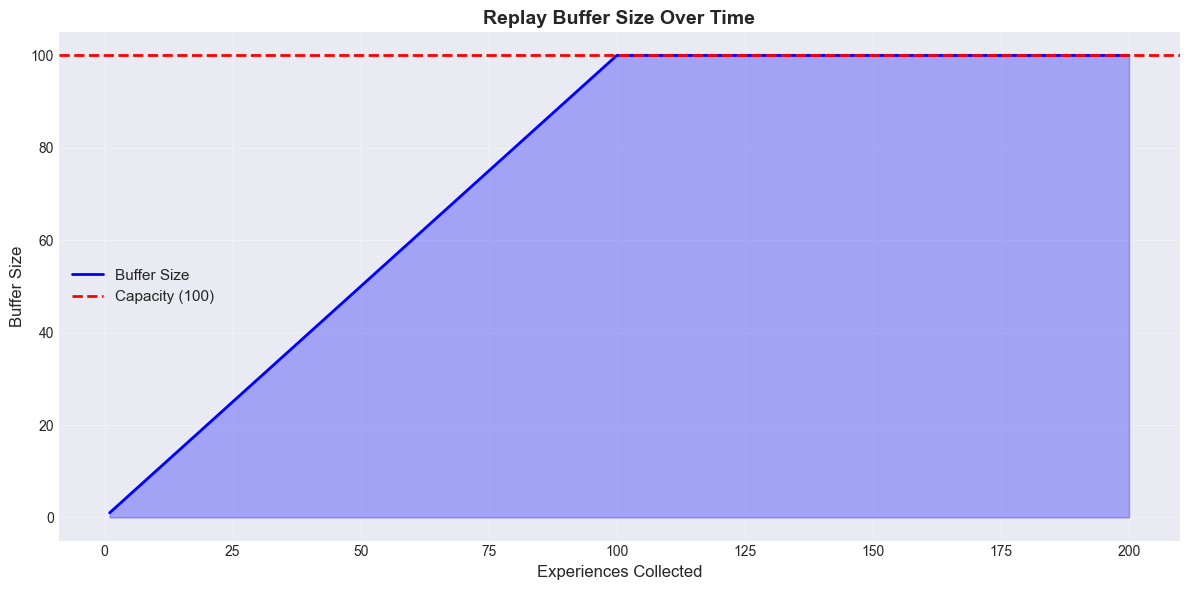

📊 Interpretation:
   • Buffer grows linearly until reaching capacity
   • After capacity is reached, oldest experiences are removed
   • This maintains a 'sliding window' of recent experiences
   • Ensures buffer contains relevant, up-to-date experiences


In [82]:
# Example 5: Visualizing Buffer Dynamics
print("" + "=" * 60)
print("Example 5: Replay Buffer Dynamics Over Time")
print("=" * 60)

# Simulate buffer filling and sampling over time
buffer_capacity = 100
replay_buffer = ReplayBuffer(capacity=buffer_capacity)

buffer_sizes = []
experiences_collected = []

# Collect experiences over time
for step in range(200):
    # Add new experience
    state = np.random.randn(4)
    action = np.random.randint(0, 3)
    reward = np.random.randn()
    next_state = np.random.randn(4)
    done = False
    
    replay_buffer.push(state, action, reward, next_state, done)
    
    buffer_sizes.append(len(replay_buffer))
    experiences_collected.append(step + 1)

# Plot buffer size over time
plt.figure(figsize=(12, 6))

plt.plot(experiences_collected, buffer_sizes, linewidth=2, color='blue', label='Buffer Size')
plt.axhline(y=buffer_capacity, color='red', linestyle='--', linewidth=2, label=f'Capacity ({buffer_capacity})')
plt.fill_between(experiences_collected, 0, buffer_sizes, alpha=0.3, color='blue')

plt.xlabel('Experiences Collected', fontsize=12)
plt.ylabel('Buffer Size', fontsize=12)
plt.title('Replay Buffer Size Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   • Buffer grows linearly until reaching capacity")
print("   • After capacity is reached, oldest experiences are removed")
print("   • This maintains a 'sliding window' of recent experiences")
print("   • Ensures buffer contains relevant, up-to-date experiences")

#### Summary: Experience Replay

**What We Learned:**

1. **The Problem**:
   - Online learning suffers from correlated samples
   - Sample inefficiency (each experience used once)
   - Catastrophic forgetting of earlier experiences

2. **The Solution**:
   - Store transitions in a replay buffer
   - Randomly sample mini-batches for training
   - Reuse experiences multiple times

3. **Key Benefits**:
   - **Breaks Correlation**: Random sampling creates i.i.d. batches
   - **Sample Efficiency**: Each experience used multiple times
   - **Stability**: Smooths learning, reduces variance
   - **Off-Policy**: Can learn from old experiences

4. **Implementation Details**:
   - Use `deque` with `maxlen` for automatic capacity management
   - Store complete transitions: $(s, a, r, s', done)$
   - Random sampling with `random.sample()`
   - Batch preparation for efficient training

5. **Practical Guidelines**:
   - Buffer size: 10,000 - 1,000,000 transitions
   - Batch size: 32 - 256 transitions
   - Start training after buffer has enough samples
   - Larger buffers = more diversity, more memory

**Impact on Deep RL:**

Experience replay was a crucial innovation that made DQN work. Without it:
- Training is unstable and often diverges
- Sample efficiency is poor
- Performance is significantly worse

With experience replay:
- DQN can learn from pixels to play Atari games
- Training is stable and reliable
- Sample efficiency is greatly improved

**Next Steps:**

Now that we have both a Q-network and experience replay, we need one more ingredient for stable DQN training: **target networks**. We'll cover this next!

#### Target Networks for Stable Training

**The Moving Target Problem**

When training a Q-network, we face a fundamental instability issue. Recall the Q-learning update:

$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
$

The problem: We're using the **same network** to:
1. Estimate the current Q-value: $Q(s, a)$
2. Estimate the target Q-value: $r + \gamma \max_{a'} Q(s', a')$

This creates a **moving target problem**:
- Every time we update the network, we change both the prediction AND the target
- It's like trying to hit a target that moves every time you adjust your aim
- This leads to oscillations, divergence, and unstable training

**The Target Network Solution**

The solution is to use **two separate networks**:

1. **Online Network** (parameters $\theta$): Updated every step, used to select actions
2. **Target Network** (parameters $\theta^-$): Updated infrequently, used to compute targets

The modified update becomes:

$
\text{Loss} = \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}} \left[ \left( r + \gamma \max_{a'} Q_{\theta^-}(s', a') - Q_\theta(s, a) \right)^2 \right]
$

where:
- $Q_\theta$ is the online network (being trained)
- $Q_{\theta^-}$ is the target network (held fixed)
- $\mathcal{D}$ is the replay buffer

**How Target Networks Work:**

1. Initialize both networks with the same weights: $\theta^- = \theta$
2. For many steps:
   - Use online network to select actions and compute current Q-values
   - Use target network to compute target Q-values
   - Update only the online network
3. Periodically (e.g., every 1000 steps): $\theta^- \leftarrow \theta$

**Why This Works:**

- The target network provides **stable targets** for many updates
- The online network can learn without chasing a moving target
- Periodic updates ensure the target network eventually catches up
- This dramatically improves training stability

**Key Hyperparameters:**

- **Update Frequency**: How often to copy weights (e.g., every 1000-10000 steps)
- **Soft Updates** (alternative): $\theta^- \leftarrow \tau \theta + (1-\tau) \theta^-$ with small $\tau$ (e.g., 0.001)

Let's implement a complete DQN agent with target networks!

In [83]:
class DQNAgent:
    """Deep Q-Network agent with experience replay and target network."""
    
    def __init__(self, state_dim, action_dim, hidden_dim=128, 
                 lr=1e-3, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, 
                 epsilon_decay=0.995, buffer_size=10000, batch_size=64,
                 target_update_freq=1000):
        """
        Initialize DQN agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of possible actions
            hidden_dim: Size of hidden layers
            lr: Learning rate
            gamma: Discount factor
            epsilon_start: Initial exploration rate
            epsilon_end: Minimum exploration rate
            epsilon_decay: Decay rate for epsilon
            buffer_size: Size of replay buffer
            batch_size: Mini-batch size for training
            target_update_freq: Steps between target network updates
        """
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq
        self.steps = 0
        
        # Create online and target networks
        self.online_network = QNetwork(state_dim, action_dim, hidden_dim)
        self.target_network = QNetwork(state_dim, action_dim, hidden_dim)
        
        # Initialize target network with same weights as online network
        self.target_network.load_state_dict(self.online_network.state_dict())
        self.target_network.eval()  # Target network is always in eval mode
        
        # Optimizer for online network
        self.optimizer = optim.Adam(self.online_network.parameters(), lr=lr)
        
        # Experience replay buffer
        self.replay_buffer = ReplayBuffer(buffer_size)
        
    def select_action(self, state, training=True):
        """Select action using epsilon-greedy policy.
        
        Args:
            state: Current state
            training: If True, use epsilon-greedy; if False, use greedy
            
        Returns:
            action: Selected action
        """
        # Exploration: random action
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.action_dim)
        
        # Exploitation: best action according to online network
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.online_network(state_tensor)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        """Store a transition in the replay buffer."""
        self.replay_buffer.push(state, action, reward, next_state, done)
    
    def update(self):
        """Perform one update step using a mini-batch from replay buffer.
        
        Returns:
            loss: TD loss value (or None if buffer too small)
        """
        # Don't update if buffer doesn't have enough samples
        if len(self.replay_buffer) < self.batch_size:
            return None
        
        # Sample mini-batch from replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        
        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        
        # Compute current Q-values using online network
        current_q_values = self.online_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # Compute target Q-values using target network
        with torch.no_grad():
            next_q_values = self.target_network(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Compute loss (Mean Squared Error)
        loss = F.mse_loss(current_q_values, target_q_values)
        
        # Optimize the online network
        self.optimizer.zero_grad()
        loss.backward()
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(self.online_network.parameters(), max_norm=10)
        self.optimizer.step()
        
        # Update target network periodically
        self.steps += 1
        if self.steps % self.target_update_freq == 0:
            self.update_target_network()
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        return loss.item()
    
    def update_target_network(self):
        """Copy weights from online network to target network."""
        self.target_network.load_state_dict(self.online_network.state_dict())
        print(f"Target network updated at step {self.steps}")


print("DQN Agent with Target Network implemented!")
print("Key components:")
print("  ✓ Online network for action selection and training")
print("  ✓ Target network for stable Q-value targets")
print("  ✓ Experience replay for breaking correlations")
print("  ✓ Epsilon-greedy exploration")
print("  ✓ Periodic target network updates")

DQN Agent with Target Network implemented!
Key components:
  ✓ Online network for action selection and training
  ✓ Target network for stable Q-value targets
  ✓ Experience replay for breaking correlations
  ✓ Epsilon-greedy exploration
  ✓ Periodic target network updates


#### Training DQN on CartPole

Now let's train our DQN agent on the CartPole environment! CartPole is a classic control problem where the goal is to balance a pole on a moving cart.

**CartPole Environment:**
- **State**: 4 continuous values (cart position, cart velocity, pole angle, pole angular velocity)
- **Actions**: 2 discrete actions (push left or push right)
- **Reward**: +1 for every timestep the pole stays upright
- **Episode ends**: When pole falls too far or cart moves off screen
- **Success**: Average reward of 195+ over 100 episodes

Let's implement the training loop:

Starting DQN training...
Training DQN on CartPole-v1
State dimension: 4
Action dimension: 2
Target network updated at step 100
Target network updated at step 200
Target network updated at step 300
Target network updated at step 400
Target network updated at step 500
Target network updated at step 600
Target network updated at step 700
Target network updated at step 800
Target network updated at step 900
Target network updated at step 1000
Target network updated at step 1100
Target network updated at step 1200
Target network updated at step 1300
Target network updated at step 1400
Target network updated at step 1500
Target network updated at step 1600
Target network updated at step 1700
Target network updated at step 1800
Target network updated at step 1900
Target network updated at step 2000
Target network updated at step 2100
Target network updated at step 2200
Target network updated at step 2300
Target network updated at step 2400
Target network updated at step 2500
Target network up

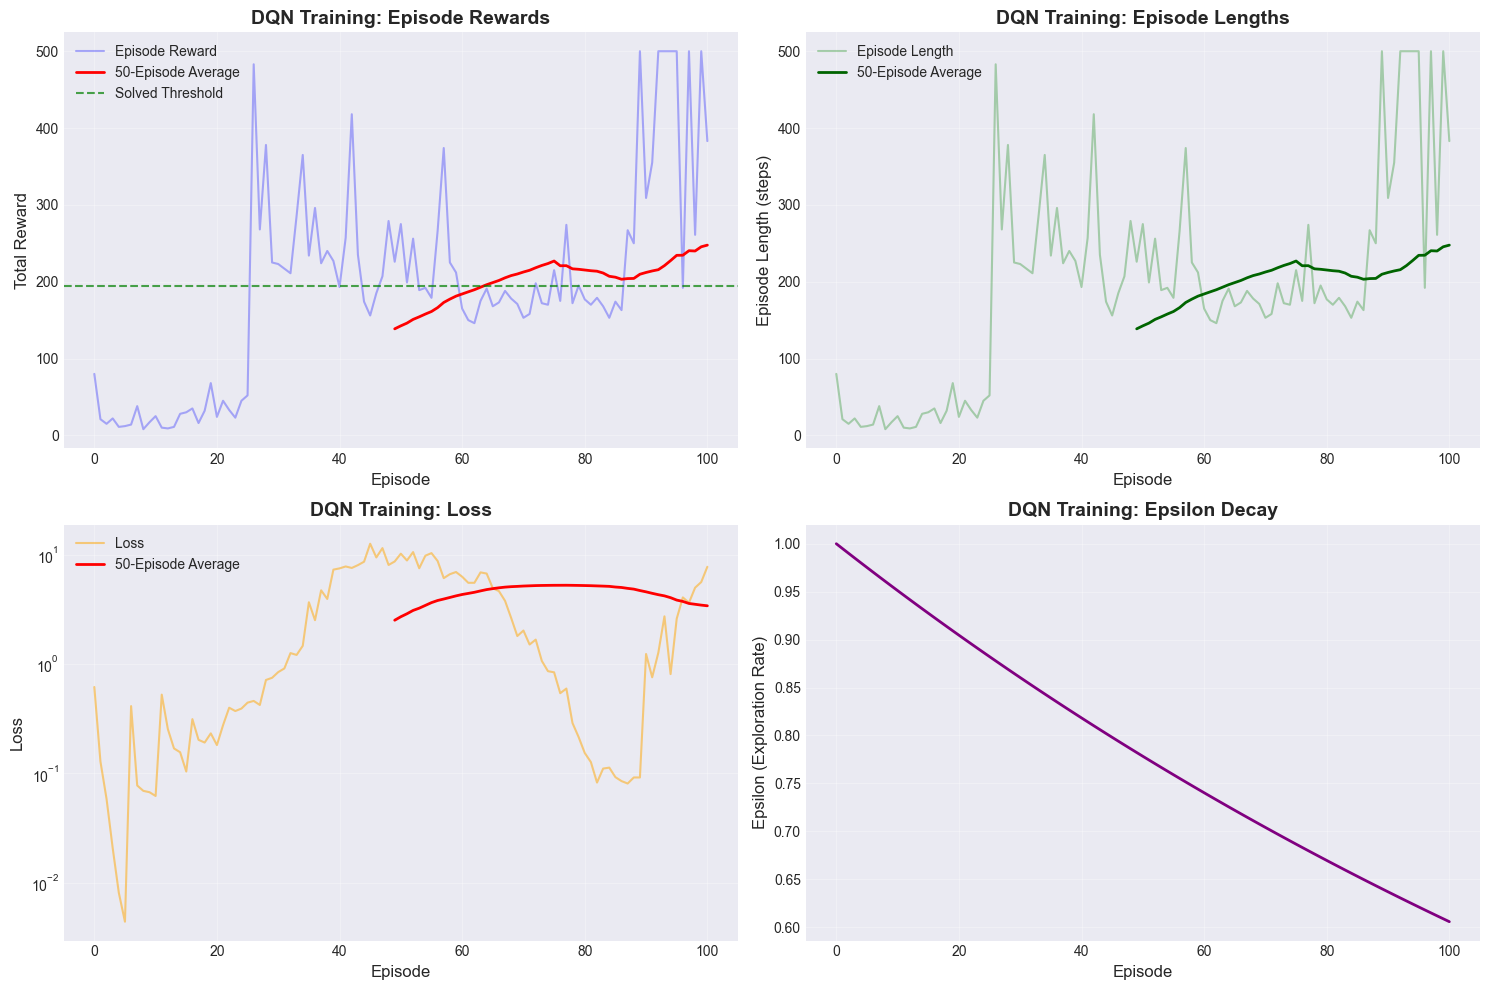


💡 Training Insights:
   - Agent explored with epsilon decay from 1.0 to 0.01
   - Used experience replay with buffer size 10000
   - Target network updated every 100 steps
   - Final performance: 195.06 average reward


In [88]:
def train_dqn(env_name='CartPole-v1', num_episodes=500, max_steps=500, print_every=50, render=False):
    """Train a DQN agent on a Gym environment.
    
    Args:
        env_name: Name of Gym environment
        num_episodes: Number of episodes to train
        max_steps: Maximum steps per episode
        print_every: Print progress every N episodes
        render: Whether to render the environment
        
    Returns:
        agent: Trained DQN agent
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
        losses: List of training losses
    """
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    print(f"Training DQN on {env_name}")
    print(f"State dimension: {state_dim}")
    print(f"Action dimension: {action_dim}")
    print("="*60)
    
    # Create agent - convert hidden_dim to list for QNetwork
    # QNetwork expects hidden_dims as a list, so we convert the single integer
    agent = DQNAgent(
        state_dim=state_dim,
        action_dim=action_dim,
        hidden_dim=[128, 128],  # Pass as list: [128, 128] creates 2 hidden layers
        lr=1e-3,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=0.995,
        buffer_size=10000,
        batch_size=64,
        target_update_freq=100
    )
    
    # Store these for later use
    agent.epsilon_start = 1.0
    agent.buffer_size = 10000
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    losses = []
    recent_rewards = deque(maxlen=100)
    
    # Training loop
    for episode in range(num_episodes):
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
            
        episode_reward = 0
        episode_loss = []
        
        for step in range(max_steps):
            if render:
                env.render()
            
            # Select and perform action
            action = agent.select_action(state, training=True)
            
            # Handle different return formats from env.step()
            step_result = env.step(action)
            
            if len(step_result) == 5:
                # New Gym API (>=0.26): returns (state, reward, terminated, truncated, info)
                next_state, reward, terminated, truncated, info = step_result
                done = terminated or truncated
            elif len(step_result) == 4:
                # Old Gym API: returns (state, reward, done, info)
                next_state, reward, done, info = step_result
            else:
                raise ValueError(f"Unexpected number of values from env.step(): {len(step_result)}")
            
            # Store transition
            agent.store_transition(state, action, reward, next_state, done)
            
            # Update agent
            loss = agent.update()
            if loss is not None:
                episode_loss.append(loss)
            
            episode_reward += reward
            state = next_state
            
            if done:
                break
        
        # Record metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(step + 1)
        recent_rewards.append(episode_reward)
        if episode_loss:
            losses.append(np.mean(episode_loss))
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(recent_rewards)
            avg_length = np.mean([lengths[-i] for i in range(1, min(101, len(lengths) + 1))])
            print(f"Episode {episode + 1}/{num_episodes}")
            print(f"  Avg Reward (last 100): {avg_reward:.2f}")
            print(f"  Avg Length (last 100): {avg_length:.1f}")
            print(f"  Epsilon: {agent.epsilon:.3f}")
            print(f"  Buffer Size: {len(agent.replay_buffer)}")
            if losses:
                print(f"  Avg Loss: {np.mean(losses[-100:]):.4f}")
        
        # Check if solved (CartPole-v1 is considered solved at 195)
        if len(recent_rewards) >= 100 and np.mean(recent_rewards) >= 195.0:
            print(f"\n🎉 Environment solved in {episode + 1} episodes!")
            print(f"   Average reward: {np.mean(recent_rewards):.2f}")
            break
    
    env.close()
    return agent, episode_rewards, episode_lengths, losses


# Train the agent
print("Starting DQN training...")
agent, rewards, lengths, losses = train_dqn(
    env_name='CartPole-v1',
    num_episodes=500,
    max_steps=500,
    print_every=50
)

print("\n" + "="*60)
print("Training completed!")
print(f"Total episodes: {len(rewards)}")
print(f"Final average reward (last 100): {np.mean(rewards[-100:]):.2f}")
print(f"Best episode reward: {max(rewards):.2f}")

# Visualize training progress
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Episode rewards
ax1 = axes[0, 0]
ax1.plot(rewards, alpha=0.3, color='blue', label='Episode Reward')
# Smooth with moving average
window = 50
if len(rewards) >= window:
    rewards_smooth = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(rewards)), rewards_smooth, 
             linewidth=2, color='red', label=f'{window}-Episode Average')
ax1.axhline(y=195, color='green', linestyle='--', label='Solved Threshold', alpha=0.7)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('DQN Training: Episode Rewards', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths
ax2 = axes[0, 1]
ax2.plot(lengths, alpha=0.3, color='green', label='Episode Length')
if len(lengths) >= window:
    lengths_smooth = np.convolve(lengths, np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(lengths)), lengths_smooth, 
             linewidth=2, color='darkgreen', label=f'{window}-Episode Average')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('DQN Training: Episode Lengths', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training loss
ax3 = axes[1, 0]
if losses:
    ax3.plot(losses, alpha=0.5, color='orange', label='Loss')
    if len(losses) >= window:
        loss_smooth = np.convolve(losses, np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(losses)), loss_smooth, 
                linewidth=2, color='red', label=f'{window}-Episode Average')
    ax3.set_xlabel('Episode', fontsize=12)
    ax3.set_ylabel('Loss', fontsize=12)
    ax3.set_title('DQN Training: Loss', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')

# Plot 4: Epsilon decay
ax4 = axes[1, 1]
# Reconstruct epsilon values
epsilon_start = 1.0
epsilon_decay = 0.995
epsilon_end = 0.01
epsilon_values = [epsilon_start * (epsilon_decay ** i) for i in range(len(rewards))]
epsilon_values = [max(epsilon_end, e) for e in epsilon_values]
ax4.plot(epsilon_values, linewidth=2, color='purple')
ax4.set_xlabel('Episode', fontsize=12)
ax4.set_ylabel('Epsilon (Exploration Rate)', fontsize=12)
ax4.set_title('DQN Training: Epsilon Decay', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Training Insights:")
print(f"   - Agent explored with epsilon decay from 1.0 to 0.01")
print(f"   - Used experience replay with buffer size {len(agent.replay_buffer)}")
print(f"   - Target network updated every 100 steps")
print(f"   - Final performance: {np.mean(rewards[-100:]):.2f} average reward")
